In [1]:
# Import required libraries :

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the required dataset

In [4]:
df = pd.read_csv("Dataset/Covid_DataSet.csv")

In [5]:
df.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [6]:
# Data Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6420 non-null   int64 
 1   tweet   6420 non-null   object
 2   label   6420 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.6+ KB


In [8]:
df.shape

(6420, 3)

In [9]:
df.label.value_counts()

real    3360
fake    3060
Name: label, dtype: int64

In [10]:
df.isnull().sum()

id       0
tweet    0
label    0
dtype: int64

In [11]:
# Exploratory Data Analysis

In [12]:
df.drop('id',axis=1,inplace=True)

In [13]:
df.head(2)

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real


In [14]:
# Label Encoding - Target Variable (label)

In [15]:
df['label'] = df.label.map({'real':1,'fake':0})

In [16]:
df.head(2)

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,1
1,States reported 1121 deaths a small rise from ...,1


In [17]:
# Data Visualization

In [18]:
real = df[df["label"] == 1]["label"] .value_counts()
fake = df[df["label"] == 0]["label"] .value_counts()
bar_chart=pd.DataFrame([real,fake],index=["real","fake"])

<AxesSubplot:>

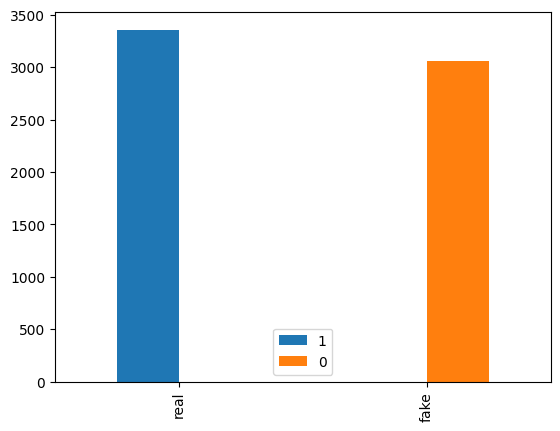

In [19]:
bar_chart.plot(kind ="bar")

# Model Development - Logistic Regression

In [20]:
# split the data into X (dependent) and  y (target)
X= df["tweet"].values
y=df["label"]

In [21]:
# Split the data into train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0)

In [22]:
# Vectorizing the text
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [23]:
# Vectorizing the traing and testing data
train_data = count_vector.fit_transform(X_train)
test_data = count_vector.transform(X_test)

In [24]:
# LogisticRegession()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_data,y_train)
y_pred = lr.predict(test_data)

In [30]:
# Evaluating the model performace using metrics
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy_Score :",accuracy_score(y_test,y_pred))
print("classification_report : ", classification_report(y_test,y_pred))

Accuracy_Score 0.9314641744548287
classification_report               precision    recall  f1-score   support

           0       0.93      0.93      0.93       313
           1       0.94      0.93      0.93       329

    accuracy                           0.93       642
   macro avg       0.93      0.93      0.93       642
weighted avg       0.93      0.93      0.93       642



# Model development with various Algorithms to check the Accuracy score

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC

In [27]:
models = [LogisticRegression(),
          DecisionTreeClassifier(max_depth=6, random_state=42),
          RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,algorithm="SAMME.R", learning_rate=0.5, random_state=42),
          SVC(gamma='auto')]

In [33]:
for model in models:
    model.fit(train_data,y_train)
    y_p = model.predict(test_data)
    print(model)
    print("Accuracy_Score :",accuracy_score(y_test,y_p))
    print("classification_report : ",'\n', classification_report(y_test,y_p))
    print('\n')

LogisticRegression()
Accuracy_Score : 0.9314641744548287
classification_report :  
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       313
           1       0.94      0.93      0.93       329

    accuracy                           0.93       642
   macro avg       0.93      0.93      0.93       642
weighted avg       0.93      0.93      0.93       642



DecisionTreeClassifier(max_depth=6, random_state=42)
Accuracy_Score : 0.8208722741433022
classification_report :  
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       313
           1       0.81      0.85      0.83       329

    accuracy                           0.82       642
   macro avg       0.82      0.82      0.82       642
weighted avg       0.82      0.82      0.82       642



RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, random_state=42)
Accuracy_Score : 0.8691588785046729
classification_report :  
   